# Understanding Decision Tree Classifier: A Mathematical Approach

Rafiq Islam  
2024-08-23

## Decision Tree

The Decision Tree Classifier is a powerful, interpretable, and
widely-used algorithm in machine learning for binary or multi-class
classification problems. Its simplicity and visual appeal make it a
go-to choice for classification tasks. However, behind this simplicity
lies a series of mathematical decisions that guide how the tree is
constructed.<br>

------------------------------------------------------------------------

## The Core Idea Behind Decision Trees

Decision Tree contains two main type of nodes, decision nodes and leaf
nodes. A decision node is a node where a condition is applied to split
the data and a leaf node contains the class of a data point. At its
heart, a decision tree works by recursively splitting the dataset based
on feature values. The goal of each split is to increase the homogeneity
of the resulting subgroups, ideally separating the different classes as
much as possible. The splitting process relies on a measure of impurity
or disorder. The two most common metrics used for this purpose are
**Gini Impurity** and **Entropy** (used in Information Gain).

**Gini Impurity**

The Gini Impurity measures the likelihood of misclassifying a randomly
chosen element from the dataset if it were labeled according to the
distribution of classes in that subset. Mathematically, the Gini
Impurity for a node $t$ is calculated as:

where $p_i$ is the proportion of samples belonging to class $i$ at node
$t$.

**Entropy and Information Gain**

Entropy, borrowed from information theory, measures the disorder or
uncertainty in the dataset. It is defined as:

$$H(t) = -\sum_{i=1}^{n} p_i \log_2(p_i)$$

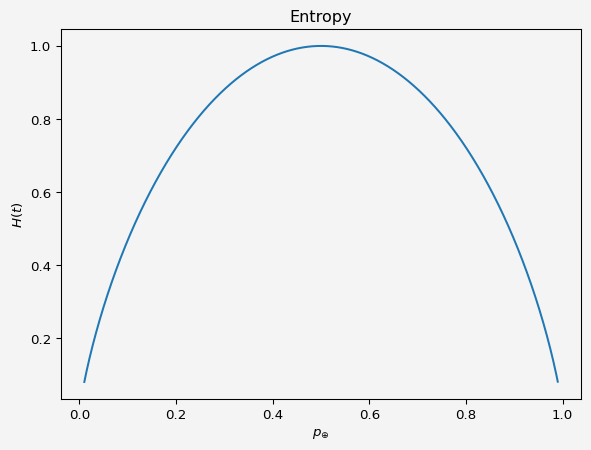

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 

x=np.arange(0.01,0.99,0.0001)
y=[-p*math.log(p,2)-(1-p)*math.log(1-p,2) for p in x]
plt.plot(x,y)
plt.xlabel('$p_{\oplus}$')
plt.ylabel('$H(t)$')
plt.title('Entropy')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Information Gain is the reduction in entropy after a dataset is split on
a feature. It is calculated as:

$$IG(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)$$

where:

-   $D$ is the dataset,
-   $A$ is the feature on which the split is made,
-   $D_v$ is the subset of $D$ for which feature $A$ has value $v$.

------------------------------------------------------------------------

Let’s explain the math with following example.

Say, I have the data set like this

| $x_0$    | $x_1$    | Class    |
|----------|----------|----------|
| 2        | 3        | 0        |
| 3        | 4        | 0        |
| 4        | 6        | 0        |
| 6        | 8        | 1        |
| 7        | 10       | 1        |
| $\vdots$ | $\vdots$ | $\vdots$ |

Total 20 data points and the scatter plot looks like this

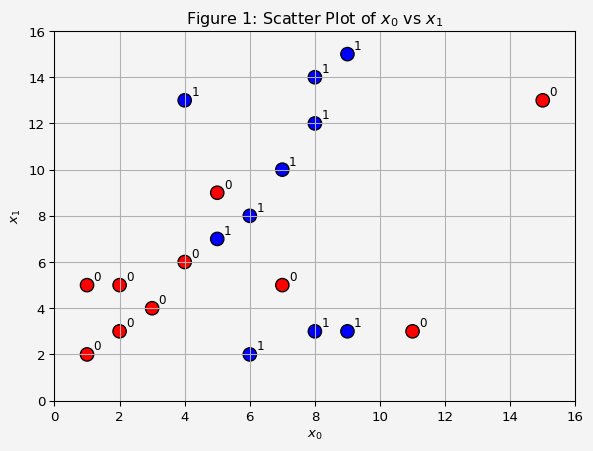

In [2]:
data = [
    [2, 3, 0], [3, 4, 0], [4, 6, 0], [6, 8, 1], [7, 10, 1],
    [8, 12, 1], [5, 7, 1], [2, 5, 0], [9, 15, 1], [1, 2, 0],
    [11, 3, 0], [4, 13, 1], [8, 14, 1], [1, 5, 0], [6, 2, 1],
    [9, 3, 1], [15, 13, 0], [7, 5, 0], [5, 9, 0], [8, 3, 1]
]

x0 = [row[0] for row in data]
x1 = [row[1] for row in data]
classes = [row[2] for row in data]

colors = ['red' if c == 0 else 'blue' for c in classes]

plt.figure(figsize=(7, 5))
plt.grid(True)

plt.scatter(x0, x1, color=colors, s=100, edgecolor='black')

# Label points with class values
for i in range(len(x0)):
    plt.text(x0[i] + 0.2, x1[i] + 0.2, str(classes[i]), fontsize=9)

# Set limits for the axes
plt.xlim(0, 16)
plt.ylim(0, 16)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
# Label axes and show plot
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Figure 1: Scatter Plot of $x_0$ vs $x_1$ ')
plt.show()

At this point, we see that the classes are not linearly separable,
meaning, we can not draw any line that separate the two classes. Notice
that the minimum and maximum of feature $x_0$ is 1 and 15, respectively.
So, let’s pick a few numbers in between these two numbers. Say, our
first number is $3.5$. In the first node, that is the root node, we
divide the data based on the feature $x_0\le 3.5$

<figure>
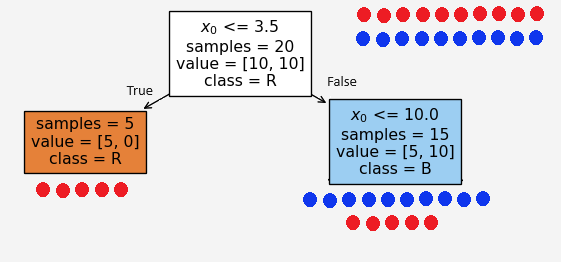
<figcaption aria-hidden="true">Figure 2: First Split</figcaption>
</figure>

At the root node, we have equal number of blue and red points so the
proportion of the data class is $p_1=p_2=0.5$, so the entropy

  
Based on the condition $x_0\le 3.5$, the left and right child recieves 5
and 15 feature points $X=(x_0,x_1)$, respectively. We see that the left
node is a pure node, because it contains only the red points. Therefore,
the entropies at these child nodes

and the information gain at this split

$$IG(split_1)=1-\left(\frac{5}{20}\cdot 0+\frac{15}{20}\cdot 0.92\right)=0.31$$

Now the burning question is how did we select the condition
$x_0\le 3.5$? It could have been any other number, say we set
$x_0\le 6.5$. Then

<figure>
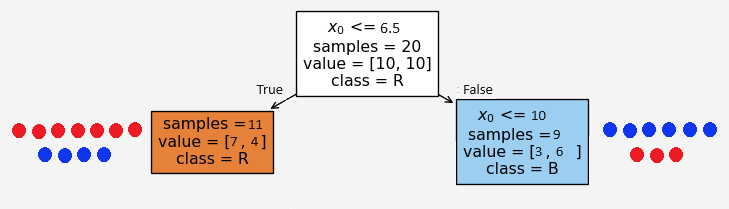
<figcaption aria-hidden="true">Figure 3: Alternative Split</figcaption>
</figure>

Based on the condition $x_0\le 6.5$, the left and right child recieves
11 and 9 feature points $X=(x_0,x_1)$, respectively. But in this case we
don’t see any pure nodes and the entropies at these child nodes

and the information gain at this split

$$IG(split_1)=1-\left(\frac{11}{20}\cdot 0.95+\frac{9}{20}\cdot 0.92\right)=0.06$$

Note that the information gain is much lower than the first option.
Therefore, the first split is better than this alternative split.
Because the goal is to have minimum entropy value and/or the maximum
information gain. This is where the machine learning gets in the game.
The algorithm finds the optimal split based on each feature values.

<figure>
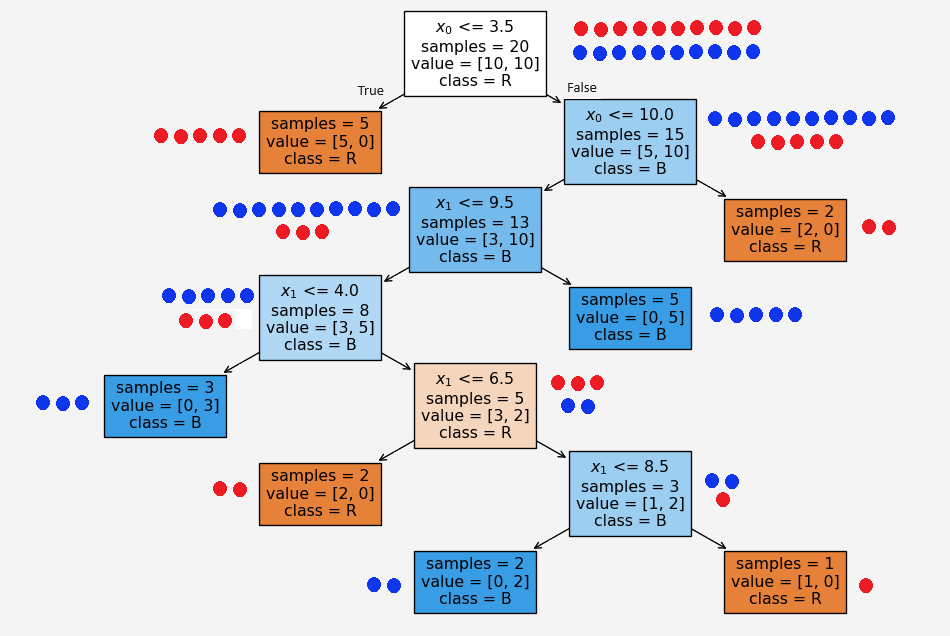
<figcaption aria-hidden="true">Figure 4: Second Split</figcaption>
</figure>

Now say we have a new set of feature values $(x_0,x_1,Class)=(10,7,1)$.
Based on our tree above, since $x_0$ is NOT less than or equal to $3.5$
so it goes to the right first child. Then it satisfies $x_0\le 10$. So
it moves to the left grand child gradually traverse through the tree and
ended up to the very bottom layer left leaf node.

## Building a Decision Tree

1.  **Choose the best feature to split on**: Calculate Gini impurity or
    Information Gain for each feature and select the feature that
    results in the highest Information Gain or lowest Gini impurity.
2.  **Split the dataset**: Partition the data based on the chosen
    feature and repeat the process for each partition.
3.  **Stop conditions**: The tree stops growing when all samples in a
    node belong to the same class, the maximum depth is reached, or
    further splitting doesn’t add value.

## Implementation of Decision Tree: Scikit-learn

Test Data 

   Feature 1  Feature 2  Class
0         10          7      1
1          9          9      0
2         11          5      1


Result 

   Feature 1  Feature 2  Class  Predicted_Class
0         10          7      1                1
1          9          9      0                0
2         11          5      1                0


Accuracy score: 0.67

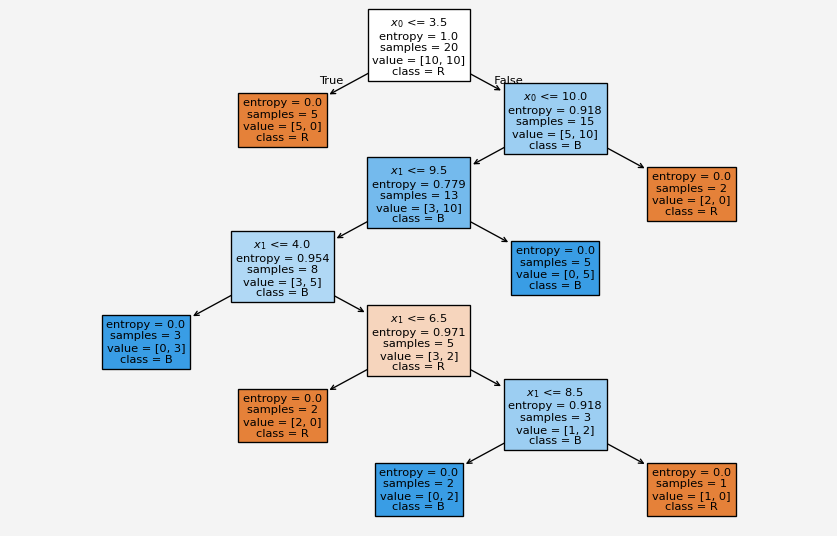

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

X=pd.DataFrame({'Feature 1':x0, 'Feature 2':x1})
y=classes


clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(X,y)


X_test=pd.DataFrame({'Feature 1':[10,9,11],'Feature 2':[7,9,5]})
y_test=pd.DataFrame({'Class':[1,0,1]})

test_data=pd.concat([X_test,y_test], axis=1)
print('Test Data \n')
print(test_data)


y_prediction=clf.predict(X_test)
prediction=pd.DataFrame({'Predicted_Class':y_prediction})
prediction=pd.concat([test_data,prediction],axis=1)
print('\n')
print('Result \n')
print(prediction)
print('\n')
print('Accuracy score:',round(accuracy_score(y_prediction,y_test),2))

plt.figure(figsize=(11,7))
plot_tree(clf, filled=True, 
          feature_names=['$x_0$','$x_1$'], 
          class_names=['R', 'B'], impurity=True,
          )
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Discussion on Decision Tree

Being a simple algorithm, it has both pros and cons. It is robust to
training data and the training data can contain missing values. However,
it is a greedy algorithm, a problem-solving technique that chooses the
best option in the current situation, without considering the overall
outcome. It also face the overfitting issue.

## Reference

[Decision Tree Classification Clearly Explained by Normalized
Nerd](https://www.youtube.com/watch?v=ZVR2Way4nwQ)

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/decisiontree/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/decisiontree/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/decisiontree/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**